# Advanced exercice: Clean the bridge data

#### Francisco Florido Valero 25740380-E

In this exercice we are going to preprocess the data of the optimization result of the structural design problem of a bridge.

In [1]:
from pyspark import SparkConf
from pyspark import SparkContext

In [2]:
spark_conf = SparkConf().setAppName("AirportType").setMaster("local[8]")
spark_context = SparkContext(conf=spark_conf)

In [3]:
logger = spark_context._jvm.org.apache.log4j
logger.LogManager.getLogger("org").setLevel(logger.Level.WARN)

### Step by step form  

In this part we are going to do a step by step way to filter the data, this way we can print the result of each step and see if we are doing all rigth. 

First we are going to load the bridge.csv file so that we can work with it.

In [4]:
lines = spark_context.textFile("D:/Documentos/Master/temariomaster/p9.Spark/masterBD/data/bridge.csv")

Now we are going to split it by "," because it is a .csv file.

In [5]:
lines_1 = lines.map(lambda line: line.split(','))

In [6]:
output = lines_1.collect()


To see what we have in our file we are going to print it so we can see how to deal with the bad data

In [7]:
for line in output:
        print(line)

['Weight', 'Deformation']
['0.1600004095193499', '0.599999565925713 ']
['0.7999996334783612', '0.105573019041743 ']
['0.3474026835213373', '0.41059125458931517 ']
['0.3409188533102768', '0.4161174319177898 ']
['0.33448446398543363', '0.4216536843155324 ']
['0.35390522300019', '0.4051006617019322 ']
['0.3280925245214544', '0.42720638686411727 ']
['0.3217358217215534', '0.43278238841939665 ']
['0.36039794488768706', '0.3996684723945372 ']
['0.3154172733712044', '0.4383797783455403']
['0.3669234753668437', '0.3942579191642874 ']
['0.37345638999357544', '0.3888892255982278 ']
['0.3091488764126171', '0.44398842406579203 ']
['0.3800121516706126', '0.38354874656944227 ']
['0.30295098086750766', '0.44959017652156535 ']
['0.2967605824612727', '']
['0.38657333470529276', '0.3782497818184258']
['0.29063517731969263', '0.4608941011769619 ']
['0.28454896813201636', '0.46656868557912423 ']
['0.39313313091886176', '0.3729967066807797']
['0.27851604294199267', '0.4722538129822601 ']
['xxxxxxxx', '0.36

In order to deal with empty lines or lines with a length bigger that 2 we are going to filter it by the length

In [8]:
lines_not_empty = lines_1.filter(lambda word: len(word) == 2)

In [9]:
lines_not_empty_2 = lines_not_empty.collect()

In [10]:
for line in lines_not_empty_2:
        print(line)

['Weight', 'Deformation']
['0.1600004095193499', '0.599999565925713 ']
['0.7999996334783612', '0.105573019041743 ']
['0.3474026835213373', '0.41059125458931517 ']
['0.3409188533102768', '0.4161174319177898 ']
['0.33448446398543363', '0.4216536843155324 ']
['0.35390522300019', '0.4051006617019322 ']
['0.3280925245214544', '0.42720638686411727 ']
['0.3217358217215534', '0.43278238841939665 ']
['0.36039794488768706', '0.3996684723945372 ']
['0.3154172733712044', '0.4383797783455403']
['0.3669234753668437', '0.3942579191642874 ']
['0.37345638999357544', '0.3888892255982278 ']
['0.3091488764126171', '0.44398842406579203 ']
['0.3800121516706126', '0.38354874656944227 ']
['0.30295098086750766', '0.44959017652156535 ']
['0.2967605824612727', '']
['0.38657333470529276', '0.3782497818184258']
['0.29063517731969263', '0.4608941011769619 ']
['0.28454896813201636', '0.46656868557912423 ']
['0.39313313091886176', '0.3729967066807797']
['0.27851604294199267', '0.4722538129822601 ']
['xxxxxxxx', '0.36

Now we are going to deal with the data that has a empty value on just one of the components

In [12]:
lines_not_empty_full = lines_not_empty.filter(lambda word: word[1] not in '' and word[0] not in '')

In [13]:
lines_not_empty_4 = lines_not_empty_full.collect()

In [14]:
for line in lines_not_empty_4:
        print(line)

['Weight', 'Deformation']
['0.1600004095193499', '0.599999565925713 ']
['0.7999996334783612', '0.105573019041743 ']
['0.3474026835213373', '0.41059125458931517 ']
['0.3409188533102768', '0.4161174319177898 ']
['0.33448446398543363', '0.4216536843155324 ']
['0.35390522300019', '0.4051006617019322 ']
['0.3280925245214544', '0.42720638686411727 ']
['0.3217358217215534', '0.43278238841939665 ']
['0.36039794488768706', '0.3996684723945372 ']
['0.3154172733712044', '0.4383797783455403']
['0.3669234753668437', '0.3942579191642874 ']
['0.37345638999357544', '0.3888892255982278 ']
['0.3091488764126171', '0.44398842406579203 ']
['0.3800121516706126', '0.38354874656944227 ']
['0.30295098086750766', '0.44959017652156535 ']
['0.38657333470529276', '0.3782497818184258']
['0.29063517731969263', '0.4608941011769619 ']
['0.28454896813201636', '0.46656868557912423 ']
['0.39313313091886176', '0.3729967066807797']
['0.27851604294199267', '0.4722538129822601 ']
['xxxxxxxx', '0.36777038884880203']
['0.40628

After that is ready, we are going to filter the values that are not numbers

In [15]:
lines_not_string = lines_not_empty_full.filter(lambda word: (word[0]).isalnum() == False and (word[1]).isalnum() == False)

In [16]:
linessss = lines_not_string.collect()

In [17]:
for lines in linessss:
    print(lines)

['0.1600004095193499', '0.599999565925713 ']
['0.7999996334783612', '0.105573019041743 ']
['0.3474026835213373', '0.41059125458931517 ']
['0.3409188533102768', '0.4161174319177898 ']
['0.33448446398543363', '0.4216536843155324 ']
['0.35390522300019', '0.4051006617019322 ']
['0.3280925245214544', '0.42720638686411727 ']
['0.3217358217215534', '0.43278238841939665 ']
['0.36039794488768706', '0.3996684723945372 ']
['0.3154172733712044', '0.4383797783455403']
['0.3669234753668437', '0.3942579191642874 ']
['0.37345638999357544', '0.3888892255982278 ']
['0.3091488764126171', '0.44398842406579203 ']
['0.3800121516706126', '0.38354874656944227 ']
['0.30295098086750766', '0.44959017652156535 ']
['0.38657333470529276', '0.3782497818184258']
['0.29063517731969263', '0.4608941011769619 ']
['0.28454896813201636', '0.46656868557912423 ']
['0.39313313091886176', '0.3729967066807797']
['0.27851604294199267', '0.4722538129822601 ']
['0.40628079773284537', '0.3625984029187178 ']
['0.4128701094135405', '

Now we are going to eliminate the repeated values

In [18]:
tuples = lines_not_string.map(lambda word: (word[0],word[1])).distinct()

In [19]:
tuples_clean = tuples.collect()

In [20]:
for lines in tuples_clean:
    print(lines)

('0.3474026835213373', '0.41059125458931517 ')
('0.3217358217215534', '0.43278238841939665 ')
('0.36039794488768706', '0.3996684723945372 ')
('0.3154172733712044', '0.4383797783455403')
('0.3091488764126171', '0.44398842406579203 ')
('0.29063517731969263', '0.4608941011769619 ')
('0.28454896813201636', '0.46656868557912423 ')
('0.27851604294199267', '0.4722538129822601 ')
('0.41945562365240663', '0.3523460745683106 ')
('0.2607841547754233', '0.48932970052841396 ')
('0.4458997130090316', '0.3322427776496839 ')
('0.2549991070353236', '0.4950256529782197 ')
('0.24925016280479606', '0.5007504192441555')
('0.45255046546599664', '0.32728129578647425 ')
('0.23229484801346945', '0.5180302417933517 ')
('0.4724584013583634', '0.31264390968499706 ')
('0.7848970329348788', '0.11405585364696387 ')
('0.7773862275965302', '0.11830491468711804 ')
('0.7699096346032278', '0.12255506347485975 ')
('0.7624534384873033', '0.126814209535216 ')
('0.5057390713054868', '0.adafasfa')
('0.7476567389424471', '0.13

For the last step we are going to deal with this value "0.adafasfa" in order to do that we have created a function that is going to try and convert all the values that we provide to float, in case that it can convert it, this function will return True, and in case that it cant the function will return False

In [22]:
def floatconverter(data):
    try: 
        float(data)
        return True
    except:
        return False

We filter by the function

In [23]:
output = tuples.filter(lambda word: (floatconverter(word[0]) == True and floatconverter(word[1]) == True))

In [24]:
output_clean = output.collect()

In [25]:
X = []
Y = []
for lines in output_clean:
    print(lines)
    X.append(float(lines[0]))
    Y.append(float(lines[1]))

('0.3474026835213373', '0.41059125458931517 ')
('0.3217358217215534', '0.43278238841939665 ')
('0.36039794488768706', '0.3996684723945372 ')
('0.3154172733712044', '0.4383797783455403')
('0.3091488764126171', '0.44398842406579203 ')
('0.29063517731969263', '0.4608941011769619 ')
('0.28454896813201636', '0.46656868557912423 ')
('0.27851604294199267', '0.4722538129822601 ')
('0.41945562365240663', '0.3523460745683106 ')
('0.2607841547754233', '0.48932970052841396 ')
('0.4458997130090316', '0.3322427776496839 ')
('0.2549991070353236', '0.4950256529782197 ')
('0.24925016280479606', '0.5007504192441555')
('0.45255046546599664', '0.32728129578647425 ')
('0.23229484801346945', '0.5180302417933517 ')
('0.4724584013583634', '0.31264390968499706 ')
('0.7848970329348788', '0.11405585364696387 ')
('0.7773862275965302', '0.11830491468711804 ')
('0.7699096346032278', '0.12255506347485975 ')
('0.7624534384873033', '0.126814209535216 ')
('0.7476567389424471', '0.13532853699081338 ')
('0.51242846418469

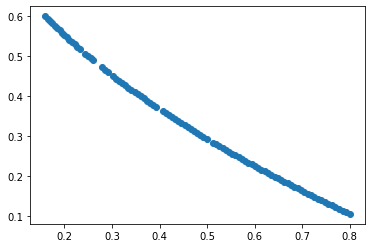

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

### Compact form

Now that we know all the steps to preprocess the data we are going to make the compact form so it looks cleaner.

In [31]:
def floatconverter(data):
    try: 
        float(data)
        return True
    except:
        return False

In [32]:
output = spark_context \
        .textFile("D:/Documentos/Master/temariomaster/p9.Spark/masterBD/data/bridge.csv") \
        .map(lambda line: line.split(',')) \
        .filter(lambda word: len(word) == 2) \
        .filter(lambda word: word[1] not in '' and word[0] not in '') \
        .filter(lambda word: (word[0]).isalnum() == False and (word[1]).isalnum() == False) \
        .filter(lambda word: (floatconverter(word[0]) == True and floatconverter(word[1]) == True)) \
        .map(lambda word: (word[0],word[1])).distinct() \
        .collect()

In [33]:
x = []
y = []

for lines in output:
    print(lines)
    x.append(float(lines[0]))
    y.append(float(lines[1]))
    

('0.3474026835213373', '0.41059125458931517 ')
('0.3217358217215534', '0.43278238841939665 ')
('0.36039794488768706', '0.3996684723945372 ')
('0.3154172733712044', '0.4383797783455403')
('0.3091488764126171', '0.44398842406579203 ')
('0.29063517731969263', '0.4608941011769619 ')
('0.28454896813201636', '0.46656868557912423 ')
('0.27851604294199267', '0.4722538129822601 ')
('0.41945562365240663', '0.3523460745683106 ')
('0.2607841547754233', '0.48932970052841396 ')
('0.4458997130090316', '0.3322427776496839 ')
('0.2549991070353236', '0.4950256529782197 ')
('0.24925016280479606', '0.5007504192441555')
('0.45255046546599664', '0.32728129578647425 ')
('0.23229484801346945', '0.5180302417933517 ')
('0.4724584013583634', '0.31264390968499706 ')
('0.7848970329348788', '0.11405585364696387 ')
('0.7773862275965302', '0.11830491468711804 ')
('0.7699096346032278', '0.12255506347485975 ')
('0.7624534384873033', '0.126814209535216 ')
('0.7476567389424471', '0.13532853699081338 ')
('0.51242846418469

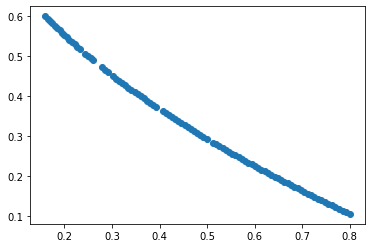

In [34]:
import matplotlib.pyplot as plt
plt.scatter(x,y)